In [1]:
########IMPORTS ZONE#########

import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.animation as anim

#####END OF IMPORTS ZONE#####

In [2]:
########PARAMETERS ZONE#########

x_dim=10                    #num of squares in the x direction
y_dim=10                    #num of squares in the y direction
pattern_name="prova"        #name of the file containing the pattern w/o the extension (it should be a txt and in the patterns folder)
evo_steps=5                 #steps of evolution to compute
time_per_image=0.5          #time per image in the animation (in s)

#####END OF PARAMETERS ZONE#####

In [3]:
########PATTERN INITIALIZATION ZONE#########
cwd=os.getcwd()
#print(cwd)
file_path = os.path.join(cwd, 'patterns', f'{pattern_name}.txt')

max_height=0
max_width=0

with open(file_path, 'r') as file:
    for line in file:
        cleaned_line=line.replace("\n", "")
        if(int(len(cleaned_line))>max_width):
            max_width=int(len(cleaned_line))
        max_height+=1

pattern=np.zeros(shape=(max_height,max_width))

with open(file_path, 'r') as file:
    for i,line in enumerate(file):
        cleaned_line=line.replace("\n", "")
        for j,char in enumerate(cleaned_line):
            pattern[i,j]=char

#print(f"Max Height: {max_height}")
#print(f"Max Width: {max_width}")

if(max_height>y_dim or max_width>x_dim):
    raise(ValueError(f"The dimensions of the pattern are too big for the simulated space.\nThe dimensions of the space are:\nX:\t{x_dim}\nY:\t{y_dim}\n\nThe dimensions of the pattern are:\nX:\t{max_width}\nY:\t{max_height}"))

center_space_x=int(x_dim/2)
center_space_y=int(y_dim/2)
center_pattern_x=int(max_width/2)
center_pattern_y=int(max_height/2)

board=np.zeros(shape=(x_dim,y_dim))

start_x = center_space_x - center_pattern_x
end_x = start_x + max_width
start_y = center_space_y - center_pattern_y
end_y = start_y + max_height

board[start_y:end_y, start_x:end_x] = pattern

    
########END OF PATTERN INITIALIZATION ZONE#########

In [4]:
############PATTERN EVOLUTION ZONE############

board_evo=[board]

for i in range(evo_steps):
    board_old=board_evo[-1]
    board_new=board_old.copy()
    for j in range(len(board_old)):
        for k in range(len(board_old[j])):
            #calculate number of alive and dead neighbours
            count = 0
            for l in range(-1, 2):
                for m in range(-1, 2):
                    if l == 0 and m == 0:
                        continue
                    new_row, new_col = j + l, k + m
                    if 0 <= new_row < len(board_old) and 0 <= new_col < len(board_old[0]) and board_old[new_row, new_col] == 1:
                        count += 1
            #calculate evolution of cell (only cases where the value of the cell is changed because board_new is a copy of board_old)
            if(board_old[j,k]==0 and count==3):                             #dead cell
                board_new[j,k]=1
            elif(board_old[j,k]==1 and (count<2 or count>3)):               #alive cell
                board_new[j,k]=0
    board_evo.append(board_new)
########END OF PATTERN EVOLUTION ZONE#########

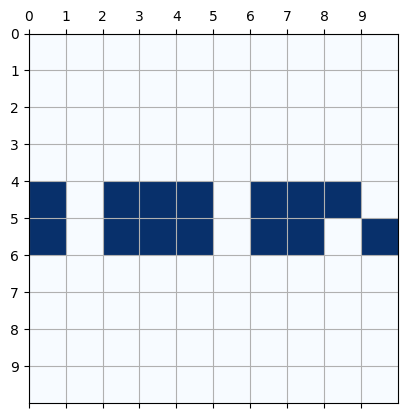

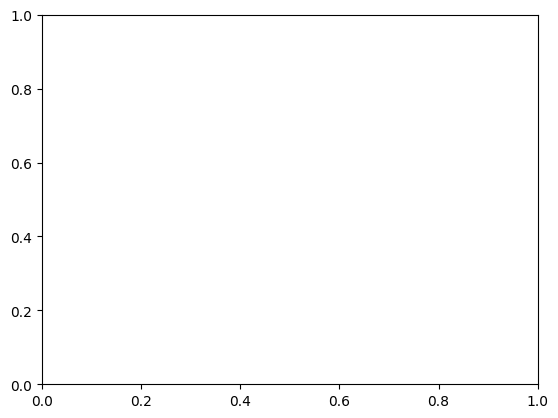

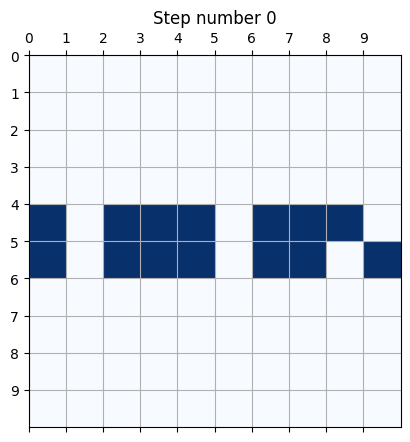

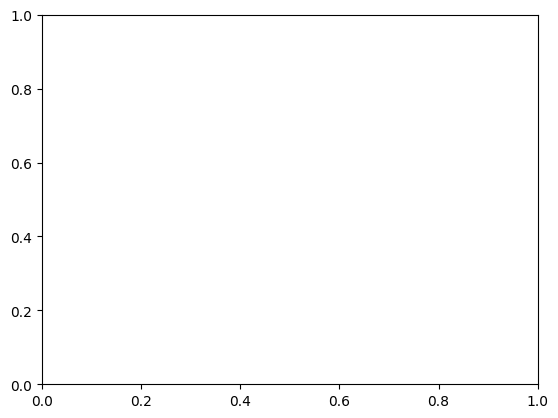

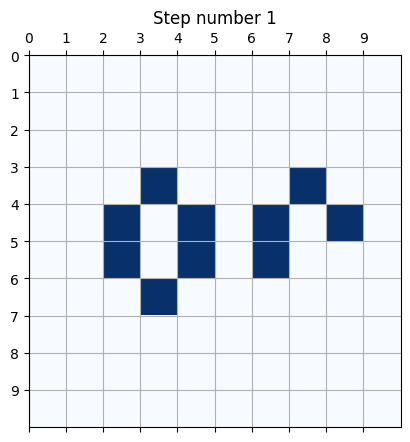

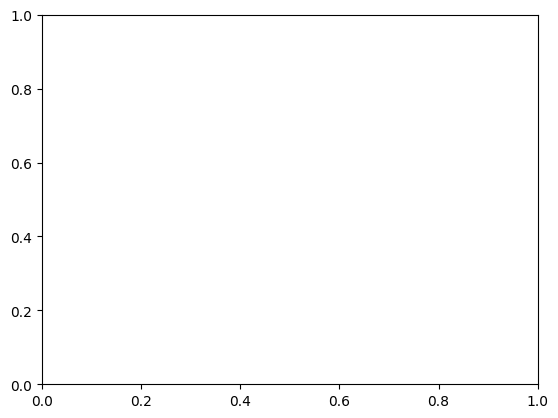

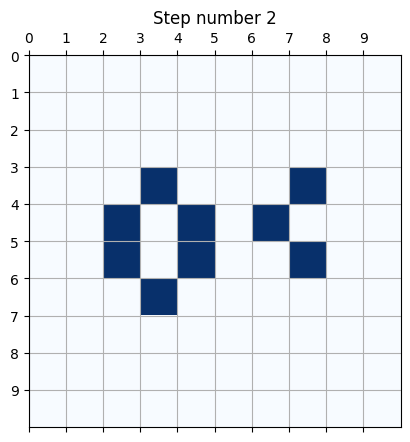

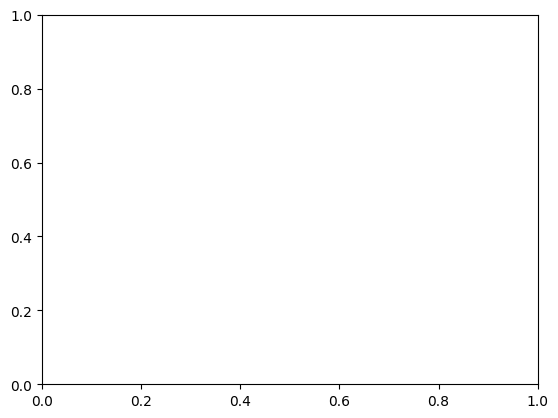

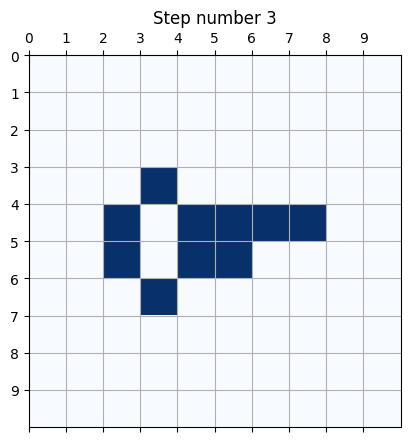

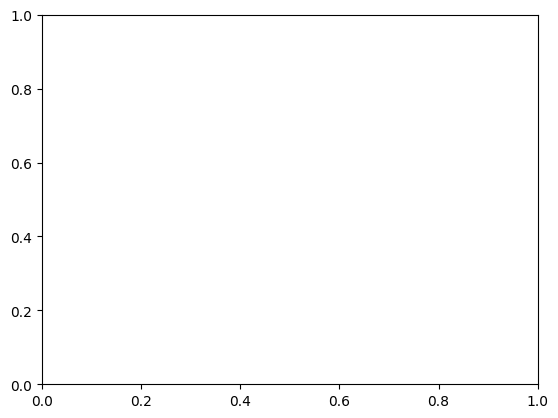

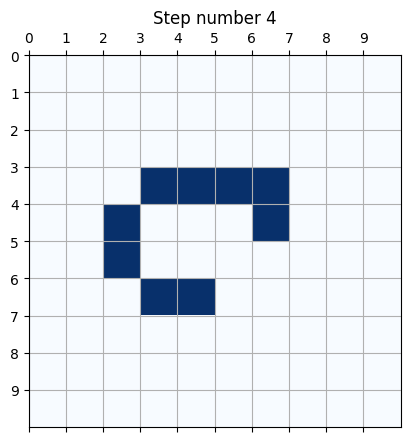

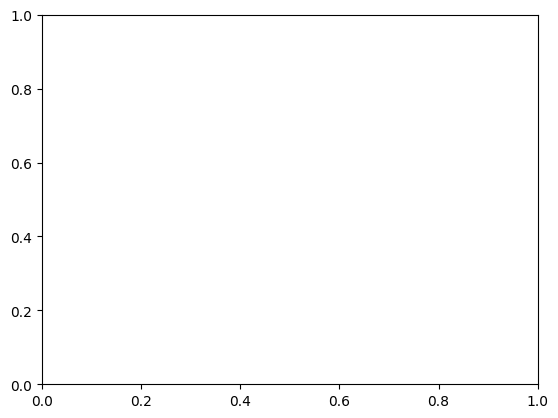

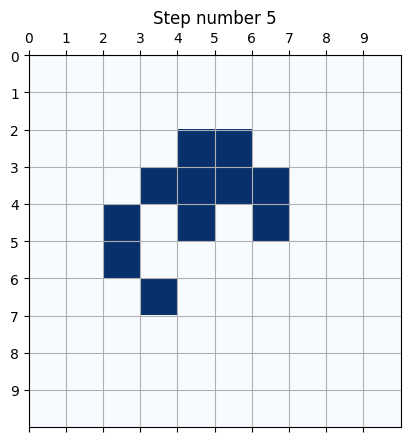

In [5]:
########START OF VISUALIZATION ZONE#########
def update(step):
    im.set_array(board_evo[step])
    ax.set_title(f"Step number {step}")
    return im,  # return the artists to be updated

fps=int(1/time_per_image)
fig, ax = plt.subplots()
im = ax.matshow(board_evo[0], cmap=plt.cm.Blues, extent=(0, board_evo[0].shape[1], board_evo[0].shape[0], 0))
ax.grid()
ax.set_xticks(np.arange(0, x_dim, 1))
ax.set_yticks(np.arange(0, y_dim, 1))
ani = anim.FuncAnimation(fig, update, frames=evo_steps+1, repeat=False, interval=time_per_image*1000)
plt.show()
ani.save(f'pattern_{pattern_name}_evolution.gif', writer='pillow',fps=fps)

for i,element in enumerate(board_evo):
    #print(element)
    #print("##########################")

    fig, ax = plt.subplots()

    plt.matshow(element, cmap=plt.cm.Blues,extent=(0, element.shape[1], element.shape[0], 0))
    plt.grid()

    plt.xticks(np.arange(0,x_dim, 1))
    plt.yticks(np.arange(0,y_dim, 1))
    plt.title(f"Step number {i}")

    plt.savefig(f"Step number {i}")
########END OF VISUALIZATION ZONE#########